### Shark Attack Analysis


The Shark Research Institute (SRI) maintains a log of shark attacks worldwide, the Global Shark Attack File (GSAF). It is continually updated as new incidents occur and was started in 1992 by the SRI. The purpose of the GSAF is to "use forensic analysis to demonstrate and emphasize the likelihood of shark/human interactions in comparison to the myriad dangers that we face in our daily lives. With a better understanding of these interactions we can minimize the possibility of being injured by a shark, and shift the discussion from fear to conservation of all shark species worldwide", per the SRI/GSAF website https://www.sharks.org/global-shark-attack-file)

The current log file, in Excel form, can be downloaded from the "chronologically" link seen on the site below:
https://www.sharks.org/global-shark-attack-file


Your goal in this project is to clean and analyze shark incidents worldwide. Some of the areas of interest in this project may include but are not limited to;

type of incident (provoked or unprovoked)
fatalities (how many people died or survived)
the shark species involved
the activity of the human when the shark attacked.
top 10 countries with the most shark attack incidents.
etc (Please feel free to come up with more interesting questions you'd like to uncover from this data)


=========================================================
Instructions


- The instruction is really simple and straightforward

- 1) Perform Data Cleaning 
- 2) Perform Exploratory Data Analysis
- 3) Show at least 8 '"Meaningful' Data Visualizations (you can do more than 8 if you want to)
- 4) Each Visualization You Show Should Have A Well-Detailed Inference On It.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('GSAF5.csv')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Location                5917 non-null   object 
 7   Activity                5910 non-null   object 
 8   Name                    6247 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6433 non-null   object 
 12  Fatal (Y/N)             5915 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

In [6]:
#checking for missing data
df.isna().sum()

Case Number                  2
Date                         1
Year                         3
Type                         5
Country                     51
Area                       463
Location                   545
Activity                   552
Name                       215
Unnamed: 9                6434
Age                       2871
Injury                      29
Fatal (Y/N)                547
Time                      3392
Species                   2924
Investigator or Source      19
pdf                       3396
href formula              3400
href                      3400
Case Number.1             3400
Case Number.2             3400
original order            3400
Unnamed: 22               6462
Unnamed: 23               6460
dtype: int64

In [7]:
#filling missing data
df['Case Number'].fillna('Nil', inplace = True)
df['Date'].fillna('Nil', inplace = True)
df['Year'].fillna('Nil', inplace = True)
df['Type'].fillna('Nil', inplace = True)
df['Country'].fillna('Nil', inplace = True)
df['Area'].fillna('Nil', inplace = True)
df['Location'].fillna('Nil', inplace = True)
df['Species '].fillna('Nil', inplace = True)
df['Activity'].fillna('Nil', inplace = True)
df['Name'].fillna('Nil', inplace = True)
df['Unnamed: 9'].fillna('Nil', inplace = True)
df['Age'].fillna('Nil', inplace = True)
df['Injury'].fillna('Nil', inplace = True)
df['Fatal (Y/N)'].fillna('Nil', inplace = True)
df['Time'].fillna('Nil', inplace = True)
df['Investigator or Source'].fillna('Nil', inplace = True)
df['pdf'].fillna('Nil', inplace = True)
df['href formula'].fillna('Nil', inplace = True)
df['href'].fillna('Nil', inplace = True)
df['Case Number.1'].fillna('Nil', inplace = True)
df['Case Number.2'].fillna('Nil', inplace = True)
df['original order'].fillna('Nil', inplace = True)
df['Unnamed: 23'].fillna('Nil', inplace = True)

In [8]:
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     0
Activity                     0
Name                         0
Unnamed: 9                   0
Age                          0
Injury                       0
Fatal (Y/N)                  0
Time                         0
Species                      0
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6462
Unnamed: 23                  0
dtype: int64

In [9]:
#dropping irrelevant columns
df.drop(columns=['Unnamed: 22'], inplace=True)
df.drop(columns=['Unnamed: 23'], inplace=True)

In [10]:
df.isna().sum()

Case Number               0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Unnamed: 9                0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
pdf                       0
href formula              0
href                      0
Case Number.1             0
Case Number.2             0
original order            0
dtype: int64

In [11]:
df['Type'].value_counts()

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Nil                       5
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

Text(0.5, 1.0, 'Frequency of Accident Types')

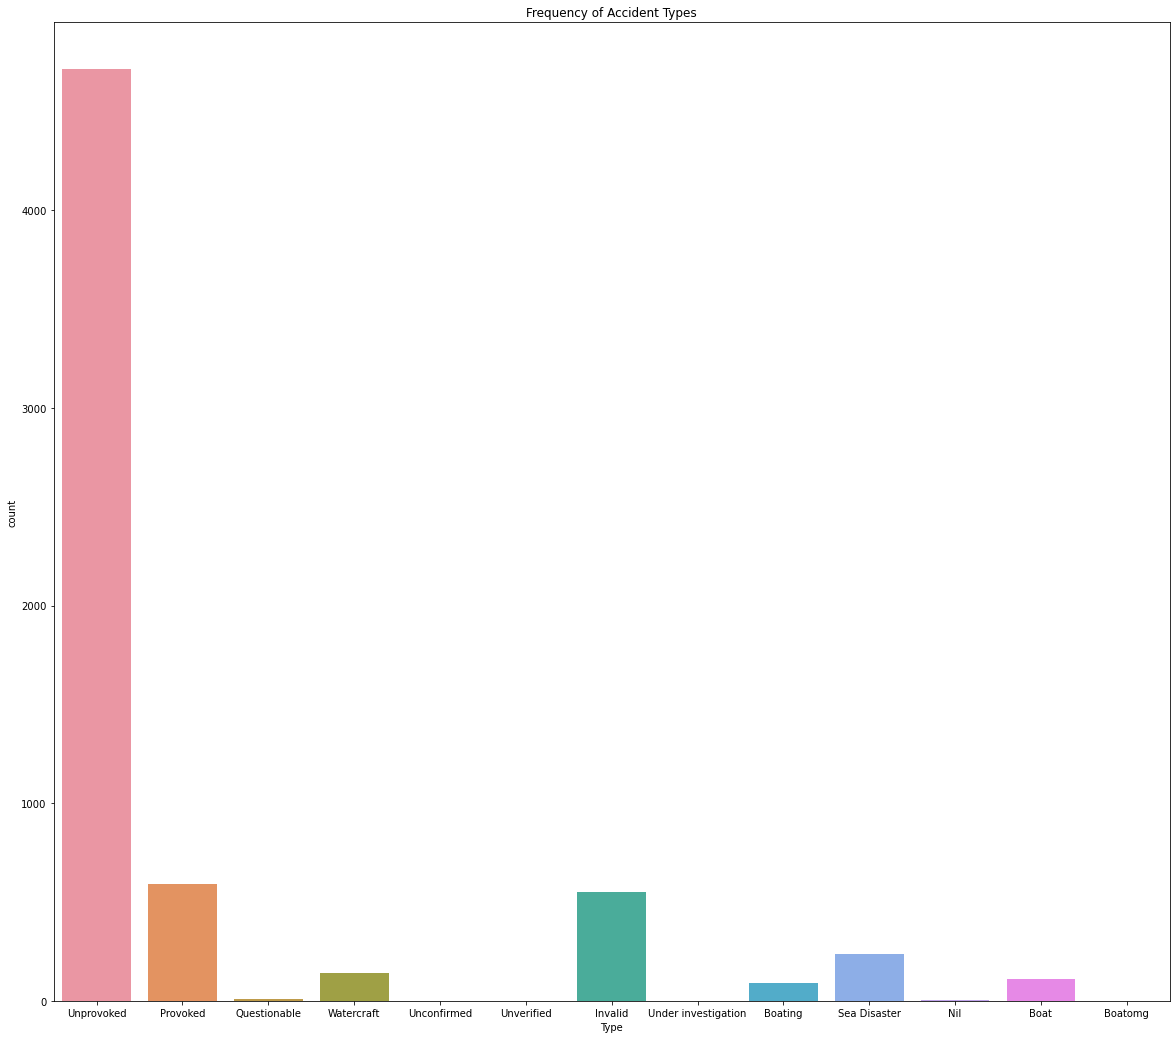

In [12]:
#visualizing major accident accident types or causes

figure = plt.figure(figsize = (20, 18))
sns.countplot(df['Type'])
plt.title("Frequency of Accident Types")

From the graph, we can deduce that 'unprovoked' attacks were the most rampant. This implies that you're susceptible to a shark attack if you're around the ocean whether you provoke them or not

Text(0.5, 1.0, 'The Frequency of victims activities before the shark attack')

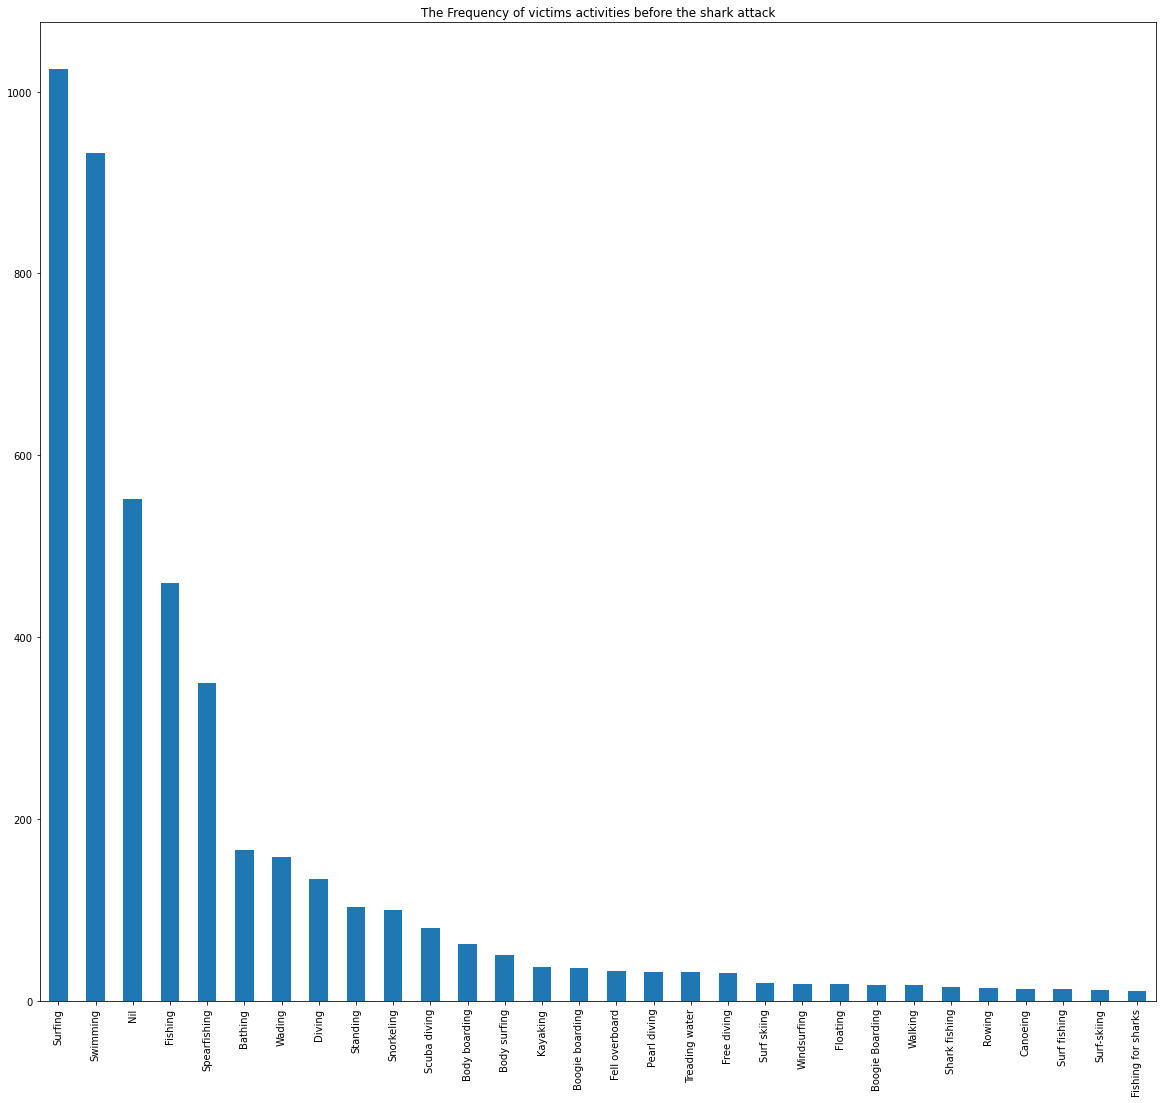

In [13]:
#Most Activities Prior to Attack
figure = plt.figure(figsize = (20, 18))
Act_freq = df['Activity'].value_counts()[:30]
Act_freq.plot(kind='bar')
plt.title('The Frequency of victims activities before the shark attack')

This figure shows that surfing and swimming in the ocean makes you more susceptible to shark attacks, as they're the leading activities most people do at the ocean before the attack. Fishing for sharks and surf-skiing is a less risky activities to try at the ocean. 

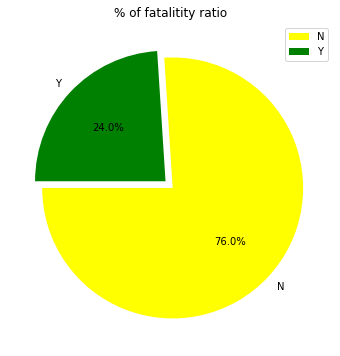

In [14]:
plt.figure(figsize=(12,6))

plt.pie(df['Fatal (Y/N)'].value_counts()[:2], explode= (0.025, 0.05), labels = df['Fatal (Y/N)'].value_counts()[:2].index, colors = ['yellow', 'green'], autopct = '%1.1f%%', startangle = 180)

plt.title('% of fatalitity ratio')
plt.legend()
plt.show()

The Y represents Yes for fatality and N represents No. From the Chart, we can see that only 24% of the total shark attacks led to death, while 76% survived the attack. This suggests that you're more likely to survive the shark attack. 

In [16]:
#checking the year with the most attack in the last 25 years

df['Year'].value_counts()[0:25]

2015.0    143
2017.0    138
2016.0    130
2011.0    128
2014.0    127
0.0       125
2008.0    122
2013.0    122
2009.0    120
2012.0    117
2007.0    112
2006.0    103
2005.0    103
2019.0    102
2010.0    101
2000.0     97
1959.0     93
2018.0     93
1960.0     93
2001.0     92
2004.0     92
2003.0     92
2002.0     88
1962.0     86
1961.0     77
Name: Year, dtype: int64

Text(0.5, 1.0, 'year with the most attack in the last 25 years')

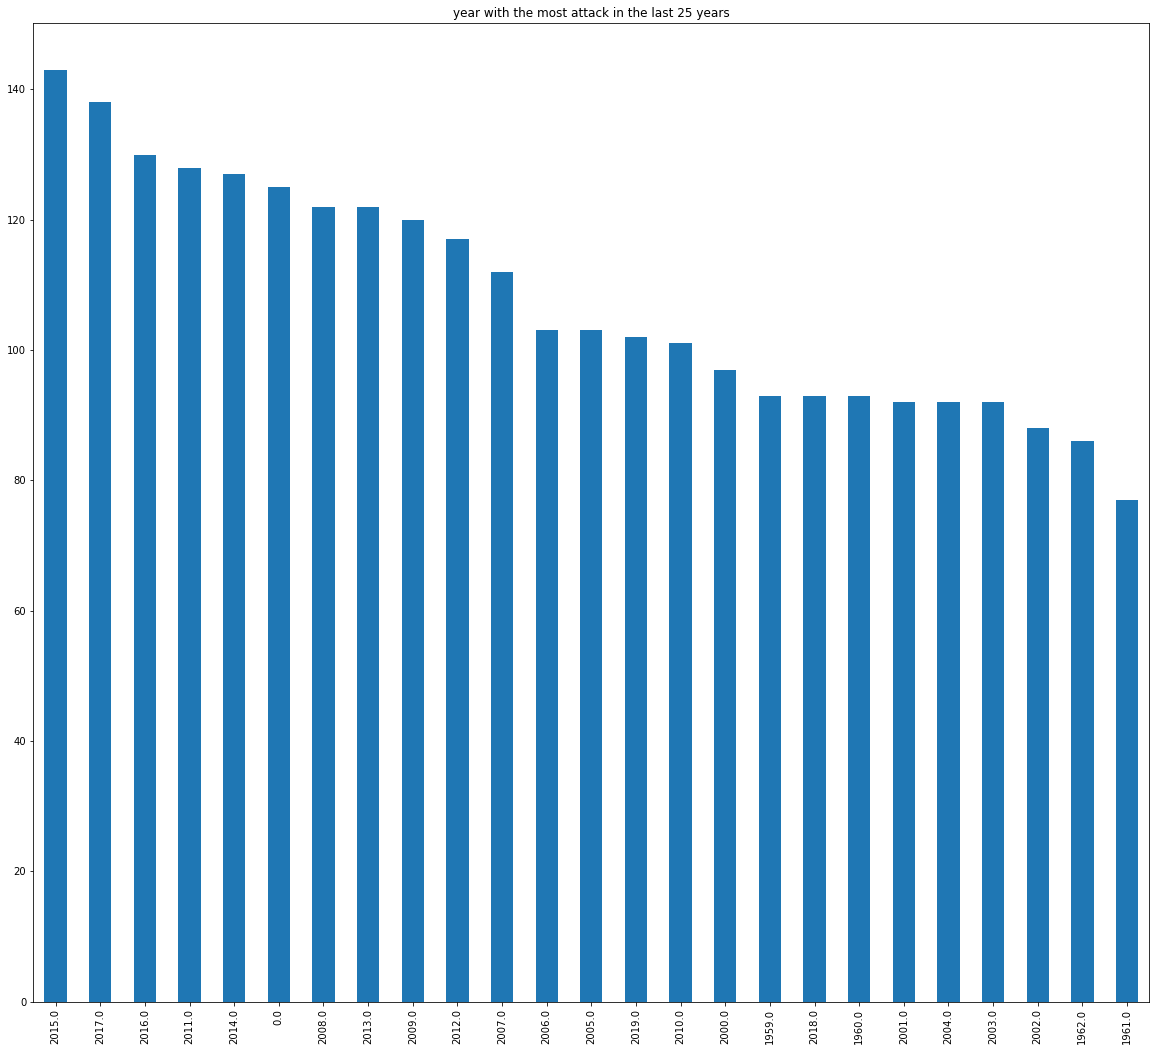

In [22]:
plt.figure(figsize=(20,18))
Year_freq= df['Year'].value_counts()[:25]
Year_freq.plot(kind='bar')
plt.title('year with the most attack in the last 25 years')

This figure firstly shows that the shark attacks increases yearly since the past 25 years with 2015 having the most attacks. 

In [19]:
#country with the most attacks
df['Country'].value_counts()[:25]

USA                 2310
AUSTRALIA           1374
SOUTH AFRICA         585
PAPUA NEW GUINEA     135
NEW ZEALAND          135
BAHAMAS              115
BRAZIL               113
MEXICO                95
ITALY                 71
PHILIPPINES           62
FIJI                  62
REUNION               60
NEW CALEDONIA         56
Nil                   51
CUBA                  46
MOZAMBIQUE            44
SPAIN                 44
EGYPT                 42
INDIA                 40
CROATIA               34
JAPAN                 34
PANAMA                32
SOLOMON ISLANDS       30
IRAN                  29
FRENCH POLYNESIA      27
Name: Country, dtype: int64

Text(0.5, 1.0, 'country with the most attacks')

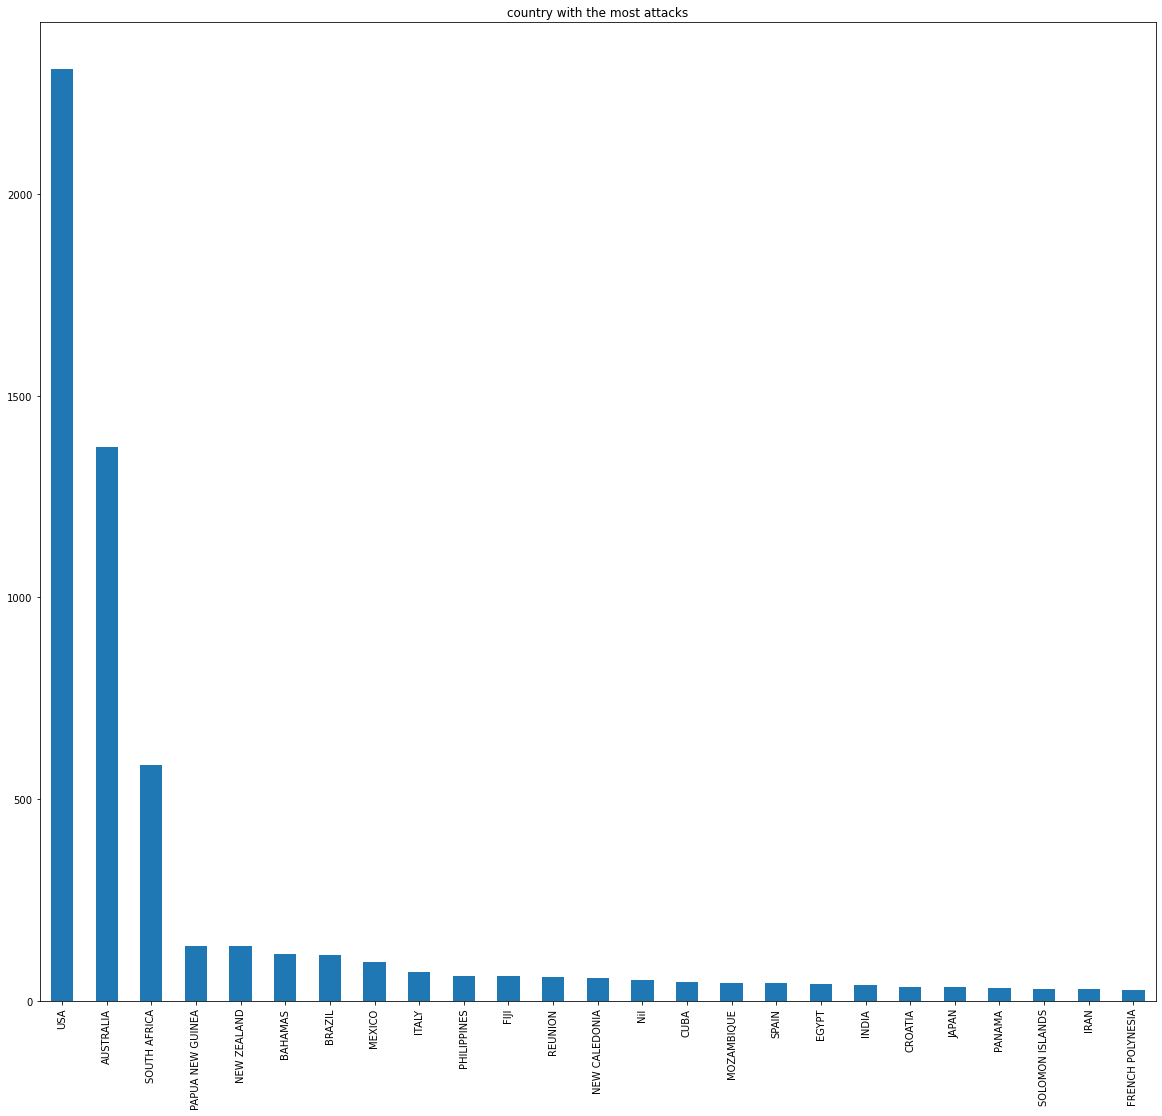

In [24]:
plt.figure(figsize=(20,18))
Country_freq= df['Country'].value_counts()[:25]
Country_freq.plot(kind='bar')
plt.title('country with the most attacks')

This figure shows the top 25 countries with the most attacks. United States has recored the most attacks, followed by Australia, While IRAN and French Polynesia have the least attacks.

In [27]:
#checking Victims Gender 
df['Unnamed: 9'].value_counts()

Nil    6434
M        24
F         4
Name: Unnamed: 9, dtype: int64

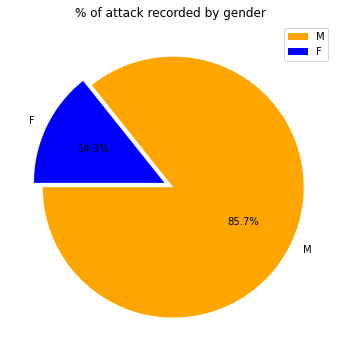

In [36]:
plt.figure(figsize=(12,6))

plt.pie(df['Unnamed: 9'].value_counts()[1:], explode= (0.025, 0.05), labels = df['Unnamed: 9'].value_counts()[1:].index, colors = ['orange', 'blue'], autopct = '%1.1f%%', startangle = 180)

plt.title('% of attack recorded by gender')
plt.legend()
plt.show()

The figure above is a representation of the identified victims' gender. It shows  that larger percent of the attacks recorded were male.

In [37]:
#identifying the location with the most attack
df['Location'].value_counts()

Nil                                                               545
New Smyrna Beach, Volusia County                                  181
Daytona Beach, Volusia County                                      34
Cocoa Beach, Brevard County                                        26
Ponce Inlet, Volusia County                                        21
                                                                 ... 
Buffels Bay (near Knysna)                                           1
Pensacola Beach, Escambia County                                    1
Cintsa East, East London                                            1
11 miles off Dog Island in the Gulf of Mexico, Franklin County      1
Below the English fort, Trincomalee                                 1
Name: Location, Length: 4149, dtype: int64

Text(0, 0.5, 'Attack Frequency')

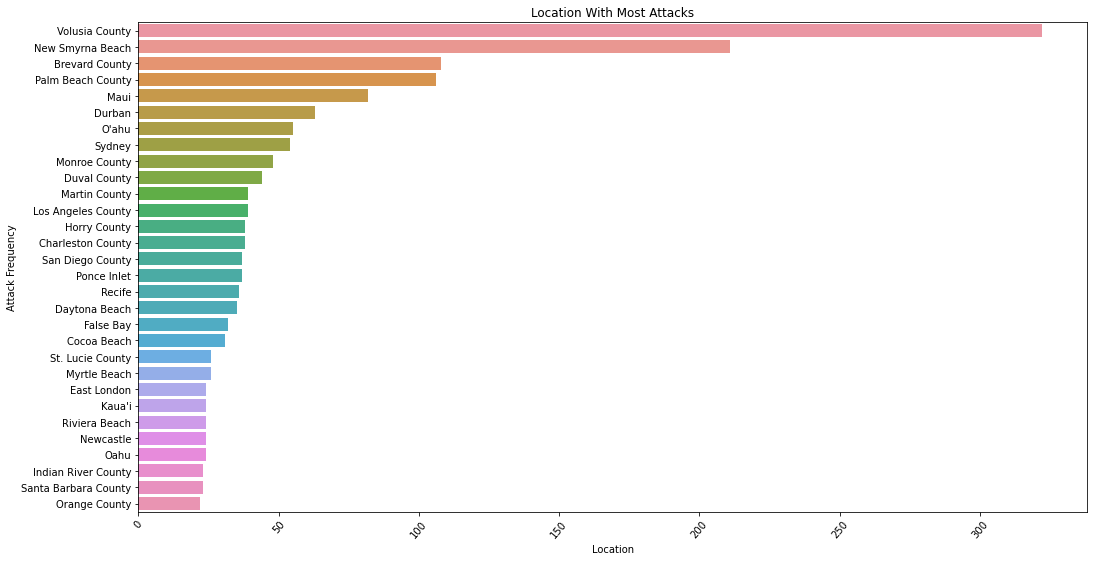

In [42]:
filter_loc = df.set_index('Type')['Location'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_location = filter_loc[filter_loc != 'Nil']
plt.figure(figsize=(17,9))
sns.countplot(y = filtered_location, order=filtered_location.value_counts().index[:30])
plt.title('Location With Most Attacks')
plt.xlabel('Location')
plt.ylabel('Attack Frequency')

The figure above highlights New Smyrna Beach and Daytona Beach in Volusia County are the locations with the most shark attacks. This makes Volusia county beaches very dangerous especially the top 2.

In [43]:
#most dangerous species 
df['Species '].value_counts()[:25]

Nil                                                   2924
White shark                                            166
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         89
Tiger shark                                             81
Shark involvement prior to death unconfirmed            68
Bull shark                                              53
4' shark                                                41
6' shark                                                40
1.8 m [6'] shark                                        38
Questionable incident                                   35
Questionable                                            34
1.5 m [5'] shark                                        33
1.2 m [4'] shark                                        29
3' shark                                                28
5' shark                                                

Text(0.5, 1.0, 'Most Dangerous Species')

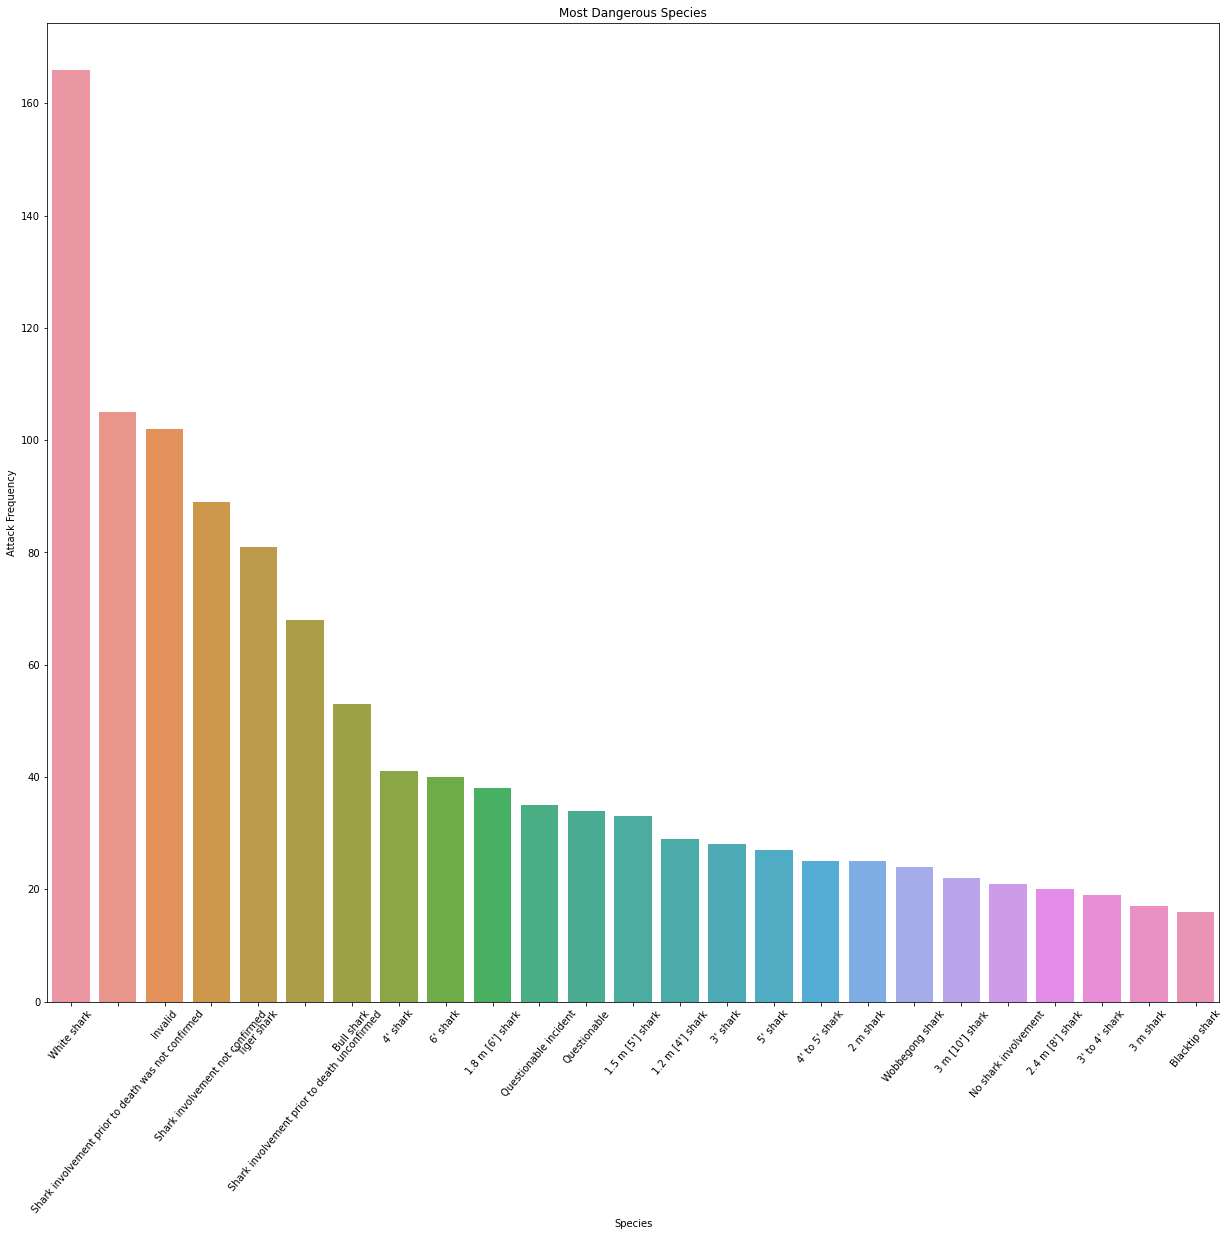

In [47]:
Dang_species = df.set_index('Type')['Species ']
Dangerous_species = Dang_species[Dang_species != 'Nil']

plt.figure(figsize = (21,18))
sns.countplot(Dangerous_species, order= Dangerous_species.value_counts().index[:25])
plt.xlabel('Species')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('Attack Frequency')
plt.title('Most Dangerous Species')

The above fgure shows that White Shark is responsible for most of the attacks within the considered timeframe

<AxesSubplot:xlabel='Location'>

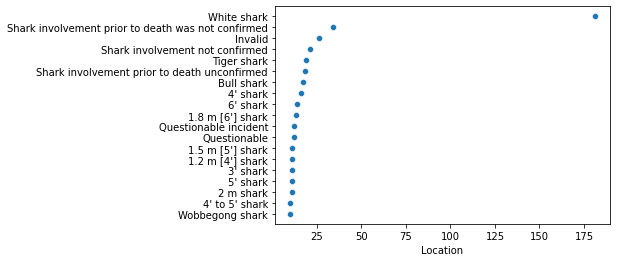

In [52]:
#showing the relationship between Species and location
sns.scatterplot(x=df['Location'].value_counts()[1:20], y=df['Species '].value_counts().index[1:20])

This scatterplot is to show the relationships between the species and the location. Unlike other species, we can see that white shark can be found in the most locations. This could be responsible for why it's the specie with the most attacks


In [54]:
#Most frequent time of attack
df['Time'].value_counts()[:25]

Nil          3392
Afternoon     193
11h00         131
Morning       126
12h00         113
15h00         111
16h00         106
14h00         102
16h30          79
17h30          77
13h00          75
17h00          74
14h30          73
18h00          72
15h30          67
11h30          65
13h30          64
10h00          63
Night          63
09h00          55
10h30          51
09h30          37
12h30          37
Evening        36
18h30          35
Name: Time, dtype: int64

Text(0.5, 1.0, 'Most frequent time of attack')

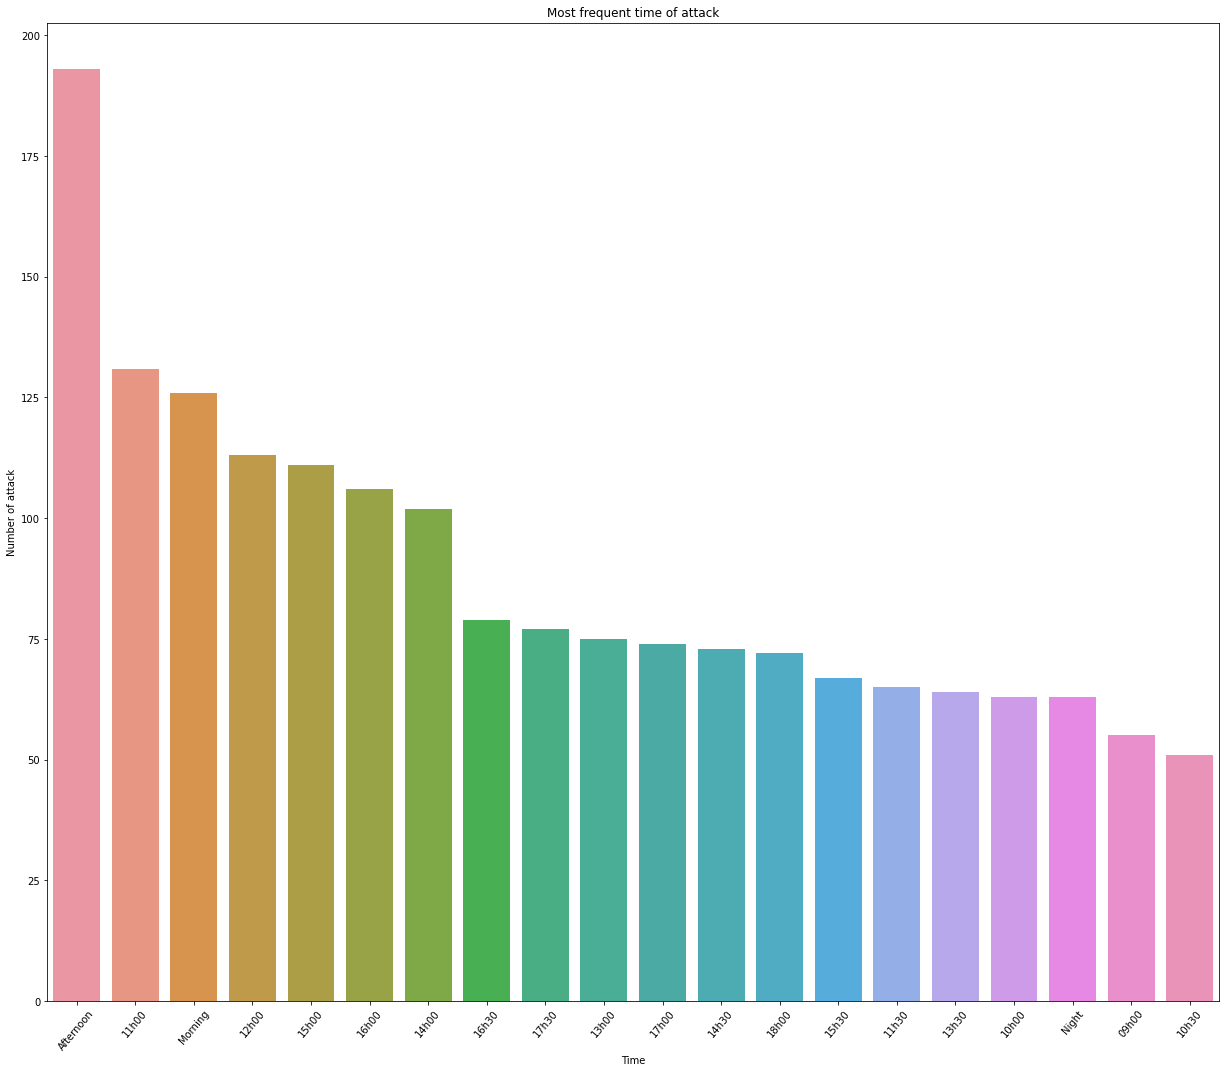

In [58]:
fil_time = df.set_index('Type')['Time']
filtered_time = fil_time[fil_time != 'Nil']

plt.figure(figsize = (21,18))
sns.countplot(filtered_time, order= filtered_time.value_counts().index[:20])
plt.xlabel('Time')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('Number of attack')
plt.title('Most frequent time of attack')

The Figure above depicts that most of the attacks shows that most of the shark attacks occur in the afternoon, followed by 11:00, and morning. 